# This notebook discovers some transformations of the albumentations library

In [10]:
import imp
import cv2
import numpy as np
import albumentations as A
from matplotlib import pyplot
from rasterio.plot import show

/tmp/ipykernel_120583/183194919.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


Full list of available transformations: https://github.com/albumentations-team/albumentations#pixel-level-transforms

A useful demo which visualizes the affects of the albumentations transformations: https://albumentations-team-albumentations-demo-srcapp-w930cw.streamlitapp.com/

Function parameters:
- Every transformation function has at least one parameter which determines the properties of the transformation
- p (probability) is a special parameter, which determines the probability with the transformation is performed or not [ A.HorizontalFlip(p=0.5) the horizontal flip is performed with a probability of 0.5 ]

**1. Defining a augmentation pipeline:**

In [19]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.8),
])

**2. Read an image:**

Besides OpenCV, it is possible to use other image processing libraries, such as Pillow.
I'll stick with OpenCV, sice I have some experience with the library.

In [23]:
image1 = cv2.imread('../Images/Rasterio_windowing/4_7.png')
image2 = cv2.imread('../Images/Rasterio_windowing/4_8.png')

# OpenCV uses BGR format, Albumentations uses RGB format, so a conversion should be performed explicitly
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

**3. Pass image to the augmentation pipeline:**

In [24]:
# It returns with a dictionary with a single key (image). The value at that key contain the augmented image.
transformed1 = transform(image=image1)

# Extracting the image from the dictionary
transformed_image1 = transformed1["image"]

# To augment a new image, it should be sent through the pipeline again
# This command performs the transformation and the extraction steps in one line
transformed_image2 = transform(image=image2)["image"]

**4. Visualize results:**

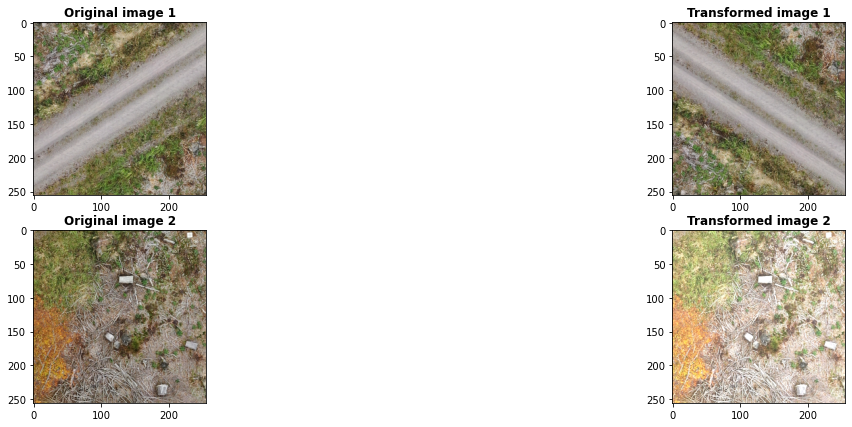

In [25]:
# Swap numpy axes to have the dimensions: (width, height, channels)
image1 = np.swapaxes(image1, 0, 2)
transformed_image1 = np.swapaxes(transformed_image1, 0, 2)
image2 = np.swapaxes(image2, 0, 2)
transformed_image2 = np.swapaxes(transformed_image2, 0, 2)

# Display union and intersection
fig, ((p_11, p_12), (p_21, p_22)) = pyplot.subplots(nrows=2, ncols=2, figsize=(21,7))
show(image1, ax=p_11, title='Original image 1')
show(transformed_image1, ax=p_12, title='Transformed image 1')
show(image2, ax=p_21, title='Original image 2')
show(transformed_image2, ax=p_22, title='Transformed image 2')
pyplot.show()